Second file analysis continue

In [392]:
import pandas as pd
import numpy as np
import datetime
import re
import string
import seaborn as sns
sns.set(font_scale=1.8)
import matplotlib.pyplot as plt

Set display option

In [393]:
# display full column

pd.set_option('display.max_colwidth', 50)

# display option all rows # default value 50

pd.set_option('display.max_rows', None)

# display all columns

pd.set_option('display.max_columns', 500)

In [394]:
# read cleaned files of the three years

df_2020 = pd.read_parquet('2020_all_data.parquet')

df_2019 = pd.read_parquet('2019_all_data.parquet')

df_2018 = pd.read_parquet('2018_all_data.parquet')

In [395]:
df_2020.head()

,service_id,service_name,location,status,event_start_time,event_end_time,event_duration_hours,first_notification,last_notification,description,vendor,monitor,org_type
0,Unknown,all,East US,-1,2020-03-03 15:30:00,2020-03-03 22:00:00,7.0,1970-01-01 00:00:00,1970-01-01 00:00:00,\nRCA- Issues connecting to resources in East ...,Azure,Azure,cloud
1,lambda-eu-west-1,AWS Lambda,Ireland,1,2020-01-08 08:05:00,2020-01-08 09:20:00,2.0,2020-01-08 09:26:00,2020-01-08 09:26:00,5:26 PM PST \nBetween 4:05 PM PST and 5:20 PM...,AWS,AWS,cloud
2,chime,Amazon Chime,Multi-region,2,2020-01-15 03:49:00,2020-01-15 07:08:00,4.0,2020-01-15 04:26:00,2020-01-15 07:11:00,12:26 PM PST \nWe are currently investigating ...,AWS,AWS,cloud
3,cloudfront,Amazon CloudFront,Multi-region,1,2020-01-29 13:12:00,2020-01-29 16:48:00,4.0,2020-01-30 15:59:00,2020-01-30 17:23:00,11:59 PM PST \nWe are investigating longer tha...,AWS,AWS,cloud
4,cloudfront,Amazon CloudFront,Multi-region,1,2020-02-13 05:10:00,2020-02-13 07:47:00,3.0,2020-02-13 08:17:00,2020-02-13 08:17:00,4:17 PM PST \nBetween 1:10 PM and 3:47 PM PST...,AWS,AWS,cloud


In [396]:
# get unique value dataframe for any column
def count_unique(df_count_initial, col_index):
    
    df_count_result = pd.DataFrame()
    df_count_result['names'] = np.NaN 
    df_count_result['frequency']= np.NaN 

    i = 0
    j = 0
    new_name = True
    while (i < len(df_count_initial) ):
        j = 0
        while (j < len(df_count_result) ):
            
            if (df_count_initial.iat[i, col_index] == df_count_result.iat[j, 0] ):
                df_count_result.iat[j, 1] = df_count_result.iat[j, 1] + 1

                df_count_initial = df_count_initial.drop(df_count_initial.index[[i]], inplace = False)
                df_count_initial = df_count_initial.reset_index(drop=True)
                i = i - 1

                new_name = False

                # j = j - 1

                # new_name = False
                break

            j = j + 1
            # print('j = ', j)


        if ( new_name == True ):

            end_row = len(df_count_result)
            df_count_result = df_count_result.append({'names':  df_count_initial.iat[i, col_index], 'frequency': 1},ignore_index=True)
            
            df_count_initial = df_count_initial.drop(df_count_initial.index[[i]], inplace = False)
            df_count_initial = df_count_initial.reset_index(drop=True)
            i = i - 1

            # df_count_result.iat[end_row, 0] = df_count_initial.iat[i, 0] 
            # df_count_result.iat[end_row, 1] = 1
            
            # print('new added, len= ', len(df_count_result))

        new_name = True


        i = i + 1

    return df_count_result      

In [397]:
# Plot setting

# plt.rc('figure', figsize=(10, 6))

# plt.rcParams.update({'font.size': 16})

2020:
                                      names  frequency
58  Google Cloud Infrastructure Components        7.0
21           Amazon Elastic Compute Cloud         6.0
56                              Operations        4.0
54                    Google Cloud Console        4.0
51                   Google Cloud Composer        4.0
3                        Amazon CloudFront        4.0
39                   Google Cloud Dataproc        3.0
36                         Google BigQuery        3.0
42                  Google Cloud Functions        3.0
13                                 Network        3.0 

2019:
                                    names  frequency
1                                Network       25.0
10         Amazon Elastic Compute Cloud        20.0
86                     Google App Engine       13.0
106             Google Kubernetes Engine       12.0
105                Google Compute Engine       12.0
97                Google Cloud Functions       10.0
109                 Google

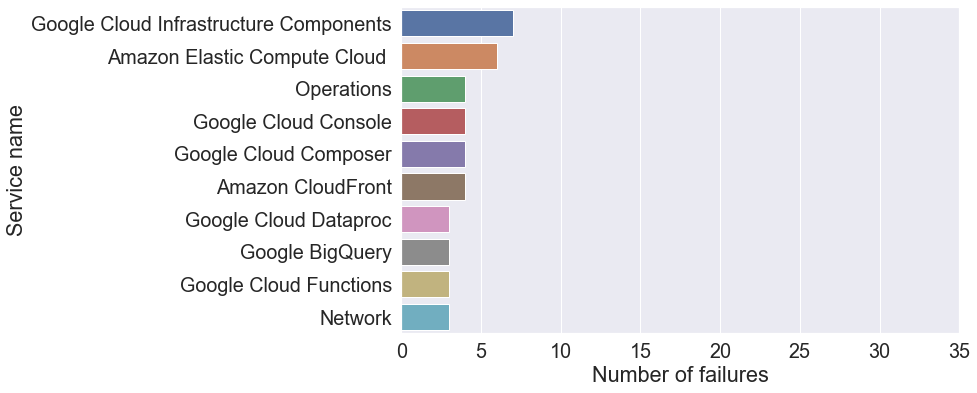

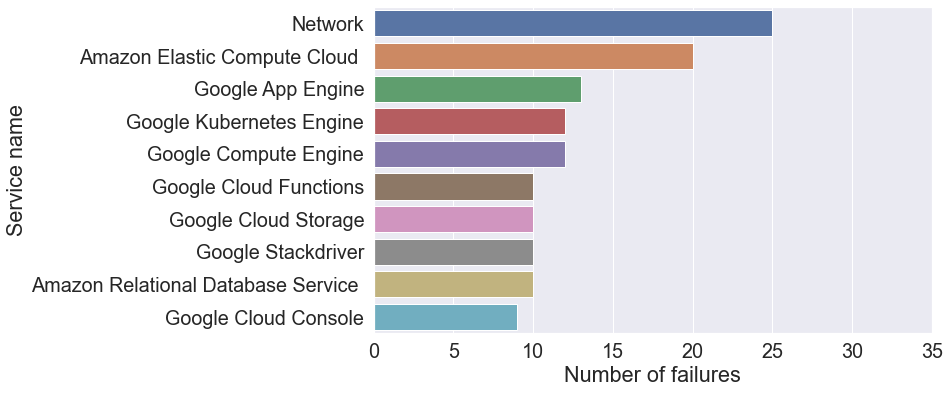

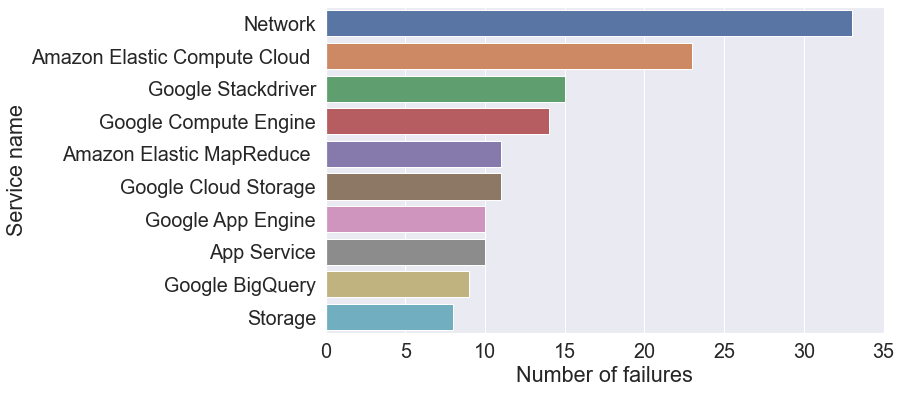

In [398]:
# top services names that 

# 2020

# [: 10] gets the top 10. using decending.

service_names_2020 = count_unique(df_2020, 1).sort_values(by = "frequency", ascending = False)[: 15]

service_names_2020 = service_names_2020[service_names_2020['names'] != 'all'][: 10]

print('2020:\n', service_names_2020, '\n')

plt.figure()

sns.barplot(x = service_names_2020['frequency'], y = service_names_2020['names'])

plt.xlabel('Number of failures')

plt.ylabel('Service name')

plt.xlim(right=35)

# plt.suptitle('2020 (till June) Services with most failures')

plt.savefig('service_names_2020.pdf', bbox_inches='tight')

# 2019

service_names_2019 = count_unique(df_2019, 1).sort_values(by = "frequency", ascending = False)[: 15]

service_names_2019 = service_names_2019[service_names_2019['names'] != 'all'][: 10]

print('2019:\n', service_names_2019, '\n')

plt.figure()

# plt.suptitle('2019 Services with most failures')

plt.xlim(right=35)

sns.barplot(x = service_names_2019['frequency'], y = service_names_2019['names'])

plt.xlabel('Number of failures')

plt.ylabel('Service name')

plt.savefig('service_names_2019.pdf', bbox_inches='tight')

# 2018

service_names_2018 = count_unique(df_2018, 1).sort_values(by = "frequency", ascending = False)[: 15]

service_names_2018 = service_names_2018[service_names_2018['names'] != 'all'][: 10]

print('2018:\n', service_names_2018, '\n')

plt.figure()

# plt.suptitle('2018 Services with most failures')

plt.xlim(right=35)

sns.barplot(x = service_names_2018['frequency'], y = service_names_2018['names'])

plt.xlabel('Number of failures')

plt.ylabel('Service name')

plt.savefig('service_names_2018.pdf', bbox_inches='tight')


Note we donot have location for many rows. The data and graph only represent known locations.

2020:
                names  frequency
5        N. Virginia       10.0
9             Sydney        8.0
6             Oregon        3.0
4      N. California        2.0
7              Paris        2.0
11           US-West        2.0
0            East US        1.0
1            Ireland        1.0
3             Mumbai        1.0
8   South Central US        1.0 

2019:
           names  frequency
8   N. Virginia       38.0
23  West Europe       12.0
5       Ireland       11.0
13       Oregon       11.0
6        London        9.0
3     Frankfurt        6.0
2       East US        6.0
17       Sydney        5.0
12         Ohio        4.0
18     UK South        4.0 

2018:
                names  frequency
15       N. Virginia       51.0
20            Oregon       17.0
33       West Europe       16.0
41       us-central1       13.0
23             Seoul       10.0
19              Ohio       10.0
5            East US        9.0
9            Ireland        9.0
31           US-West        6.0
25  So

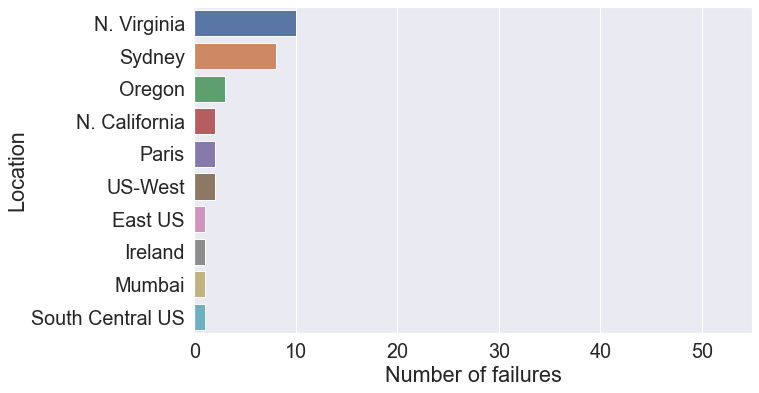

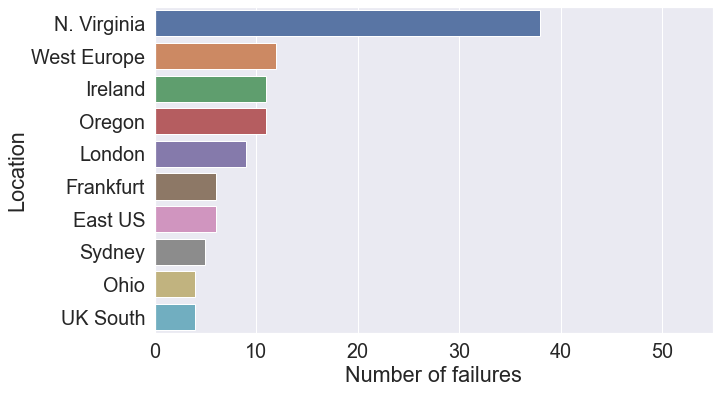

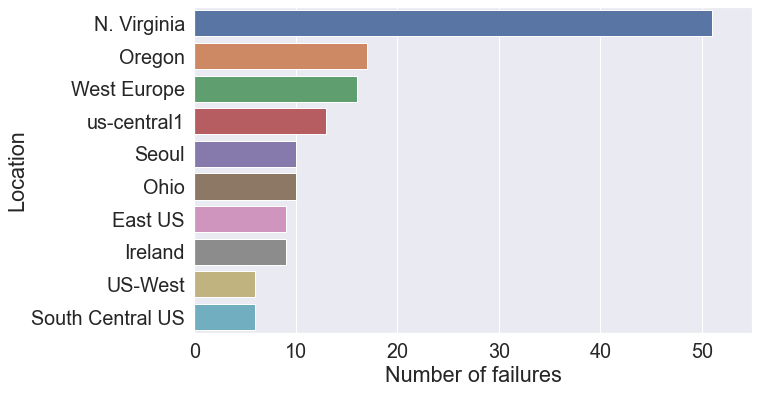

In [399]:
# top locations names  

# 2020

location_2020 = count_unique(df_2020, 2).sort_values(by = "frequency", ascending = False)[: 15]

location_2020 = location_2020[(location_2020['names'] != 'Unknown') & (location_2020['names'] != 'Multi-region')][: 10]

print('2020:\n', location_2020, '\n')

plt.figure()

sns.barplot(x = location_2020['frequency'], y = location_2020['names'])

plt.xlabel('Number of failures')

plt.ylabel('Location')

# plt.suptitle('2020 Locations with most failures')

plt.xlim(right=55)

plt.savefig('location_2020.pdf', bbox_inches='tight')

# 2019

location_2019 = count_unique(df_2019, 2).sort_values(by = "frequency", ascending = False)[: 15]

location_2019 = location_2019[(location_2019['names'] != 'Unknown') & (location_2019['names'] != 'Multi-region')][: 10]

print('2019:\n', location_2019, '\n')

plt.figure()

sns.barplot(x = location_2019['frequency'], y = location_2019['names'])

plt.xlabel('Number of failures')

plt.ylabel('Location')

# plt.suptitle('2019 Locations with most failures')

plt.xlim(right=55)

plt.savefig('location_2019.pdf', bbox_inches='tight')

# 2018

location_2018 = count_unique(df_2018, 2).sort_values(by = "frequency", ascending = False)[: 15]

location_2018 = location_2018[(location_2018['names'] != 'Unknown') & (location_2018['names'] != 'Multi-region')][: 10]

print('2018:\n', location_2018, '\n')

plt.figure()

sns.barplot(x = location_2018['frequency'], y = location_2018['names'])

plt.xlabel('Number of failures')

plt.ylabel('Location')

# plt.suptitle('2018 Locations with most failures')

plt.xlim(right=55)

plt.savefig('location_2018.pdf', bbox_inches='tight')


Plot

title: number of failures per day

x axis: 0 - 365

y axis: num of failures

points: dot or line dot


In [400]:
# add column with day number (of the year) of failure

df_2020['event_start_day_num'] = df_2020.event_start_time.apply(lambda x: x.timetuple().tm_yday)

df_2019['event_start_day_num'] = df_2019.event_start_time.apply(lambda x: x.timetuple().tm_yday)

df_2018['event_start_day_num'] = df_2018.event_start_time.apply(lambda x: x.timetuple().tm_yday)



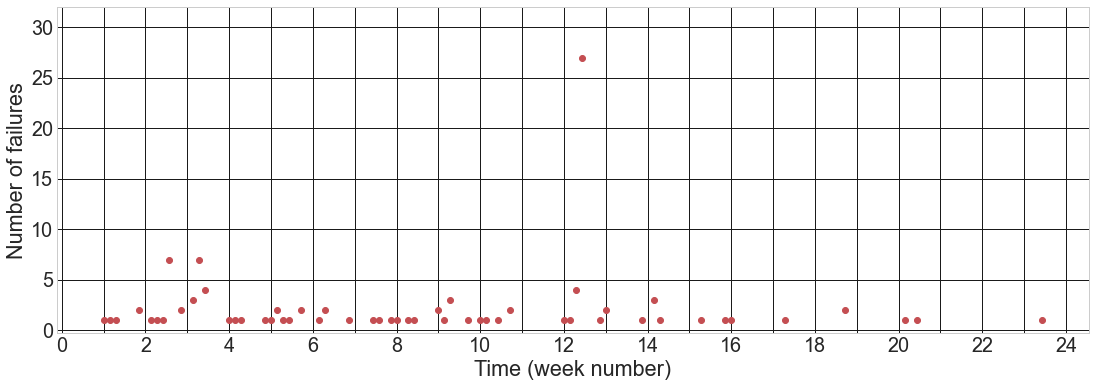

In [401]:
# 2020 number of failures per day

# group together same days and have other column as count

even_start_day_2020 = df_2020.groupby(['event_start_day_num']).count()

# plot setup

plt.style.use('seaborn-whitegrid')

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 200, 7))

x_tick_label = (np.arange(0, 200, 7) / 7).astype(int).astype(str)

for index, x in enumerate(x_tick_label):
    
    if(index % 2 != 0): 
        x_tick_label[index] = ""
    
    
ax.set_xticklabels(x_tick_label)

ax.set_yticks(np.arange(0, even_start_day_2020.org_type.max() + 5, 5))

plt.scatter(x=even_start_day_2020.index, y=even_start_day_2020.org_type, marker='o', color='r')

plt.ylim(top=even_start_day_2020.org_type.max() + 5)

ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)

# fig.suptitle('2020 number of failures per week')

plt.xlabel('Time (week number)')

plt.ylabel('Number of failures')

fig.set_size_inches(18.5, 6)

fig.savefig('2020_failures_per_week.pdf', bbox_inches='tight')

# 2020 is half year so it ends in week 24

In [402]:
x_tick_label = (np.arange(0, 365, 7) / 7).astype(int).astype(str)

for index, x in enumerate(x_tick_label):
    
    if(index % 2 != 0): 
        x_tick_label[index] = ""
    
    
x_tick_label

array(['0', '', '2', '', '4', '', '6', '', '8', '', '10', '', '12', '',
       '14', '', '16', '', '18', '', '20', '', '22', '', '24', '', '26',
       '', '28', '', '30', '', '32', '', '34', '', '36', '', '38', '',
       '40', '', '42', '', '44', '', '46', '', '48', '', '50', '', '52'],
      dtype='<U11')

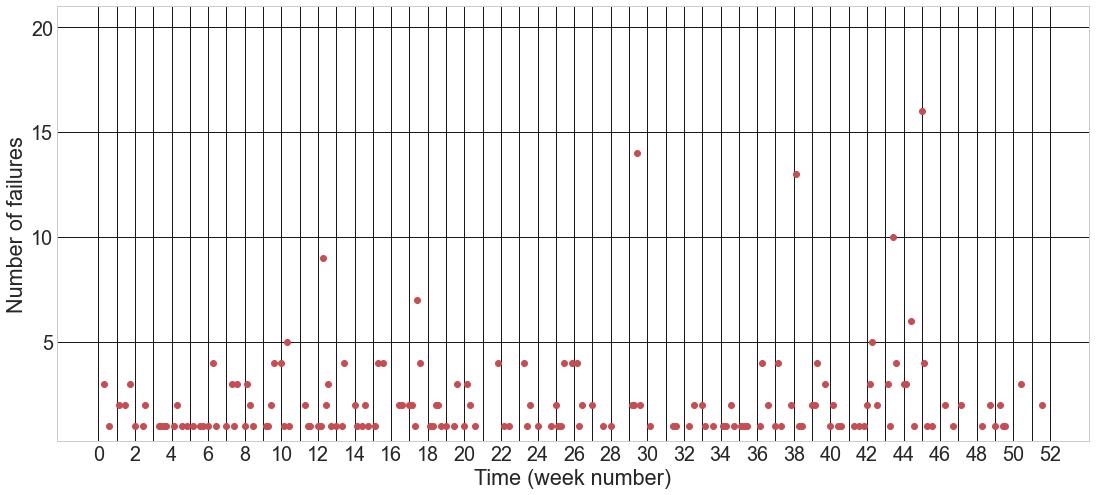

In [403]:
# 2019 number of failures per day

# group together same days and have other column as count

even_start_day_2019 = df_2019.groupby(['event_start_day_num']).count()

# plot setup

plt.style.use('seaborn-whitegrid')

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 365, 7))

ax.set_xticklabels(x_tick_label)

ax.set_yticks(np.arange(0, even_start_day_2019.org_type.max() + 5, 5))

plt.scatter(x=even_start_day_2019.index, y=even_start_day_2019.org_type, marker='o', color='r')

plt.ylim(top=even_start_day_2019.org_type.max() + 5)

ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)

# fig.suptitle('2019 number of failures per week')

plt.xlabel('Time (week number)')

plt.ylabel('Number of failures')

fig.set_size_inches(18.5, 8)

fig.savefig('2019_failures_per_week.pdf', bbox_inches='tight')

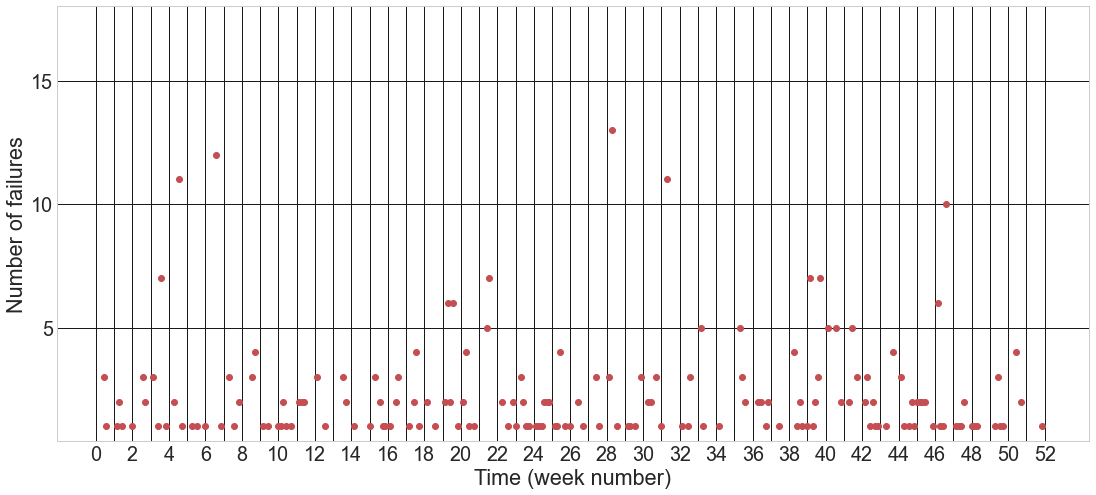

In [404]:
# 2018 number of failures per day

# group together same days and have other column as count

even_start_day_2018 = df_2018.groupby(['event_start_day_num']).count()

# plot setup

plt.style.use('seaborn-whitegrid')

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 365, 7))

ax.set_xticklabels(x_tick_label)

ax.set_yticks(np.arange(0, even_start_day_2018.org_type.max() + 5, 5))

plt.scatter(x=even_start_day_2018.index, y=even_start_day_2018.org_type, marker='o', color='r')

plt.ylim(top=even_start_day_2018.org_type.max() + 5)

ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)

# fig.suptitle('2018 number of failures per week')

plt.xlabel('Time (week number)')

plt.ylabel('Number of failures')

fig.set_size_inches(18.5, 8)

fig.savefig('2018_failures_per_week.pdf', bbox_inches='tight')

Analysis of description

Do tf-idf of desciption

purpose: aim to find out main reasoning for failures

In [405]:
df_2020.description[2]

'12:26 PM PST \nWe are currently investigating increased application faults and decreased availability for Amazon Chime.12:45 PM PST \nWe have identified the root cause of the increased application faults and decreased availability for Amazon Chime. Customers who are already signed into the Chime Client are not advised to logout, or select the re-connection option. 1:36 PM PST \nWe have identified the root cause of the increased application faults and decreased availability for Amazon Chime, and can confirm recovery for some users. Customers who are already signed into the Chime Client are not advised to logout, or select the re-connection option, as we continue to work towards resolution. 2:30 PM PST \nWe have identified the root cause of the increased application faults and decreased availability for Amazon Chime, and can confirm recovery for audio meeting and chat features. We continue to work towards resolving decreased video conferencing availability. 3:11 PM PST \nBetween 11:49 A

In [406]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

v = TfidfVectorizer(ngram_range = (2,2), stop_words=my_stop_words, max_features = 50)
description_tfid = v.fit_transform(df_2020.description)
description_df = pd.DataFrame(description_tfid.toarray(), columns=v.get_feature_names())
description_df.sum().sort_values(ascending=False)

2020 03                 23.142625
error rates             19.836211
pm pst                  16.248647
affected customers      11.783507
2020 01                 10.916667
2020 02                  8.668335
modified 2020            6.795574
created 2020             6.795574
03 27t00                 5.194873
google com               5.169639
03 27t01                 5.146636
thursday 2020            5.079752
com incident             5.065866
https status             5.065866
incident zall            5.065866
status cloud             5.065866
cloud google             4.999634
03 26                    4.876567
zall 20003               4.696801
issue cloud              4.614341
text description         4.096735
00 pacific               3.404041
2020 04                  3.374458
nwe provide              3.297753
elevated error           3.207068
error rate               3.154828
issue google             2.914694
google cloud             2.647224
time 2020                2.567629
nworkaround ti

In [407]:
# Finding day name 

df_2020['day_num_of_week'] = df_2020.event_start_time.apply(lambda x: x.timetuple().tm_wday)

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df_2020['day_of_week'] = df_2020.day_num_of_week.apply(lambda x: day_names[x])


In [408]:
sns.set(font_scale=1.5)

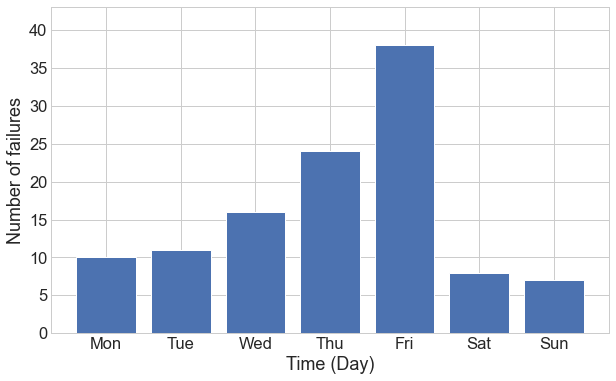

In [409]:
# Plotting day name vs failure frequency

# group together same days and have other column as count

even_start_day_2020 = df_2020.groupby(['day_of_week']).count()

even_start_day_2020 = even_start_day_2020.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# plot setup

plt.style.use('seaborn-whitegrid')

fig = plt.figure()

# ax = fig.add_subplot(1, 1, 1)

# ax.set_xticks(np.arange(0, 200, 7))

# ax.set_xticklabels((np.arange(0, 200, 7) / 7).astype(int))

# ax.set_yticks(np.arange(0, even_start_day_2020.org_type.max() + 5, 5))

# plt.scatter(x=even_start_day_2020.index, y=even_start_day_2020.org_type, marker='o', color='r')

plt.bar(x=even_start_day_2020.index, height=even_start_day_2020.org_type)

plt.ylim(top=even_start_day_2020.org_type.max() + 5)

# ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)

# fig.suptitle('2020 number of failures per day')

plt.xlabel('Time (Day)')

plt.ylabel('Number of failures')

# fig.set_size_inches(18.5, 10.5)

fig.savefig('2020_failures_per_day.pdf', bbox_inches='tight')

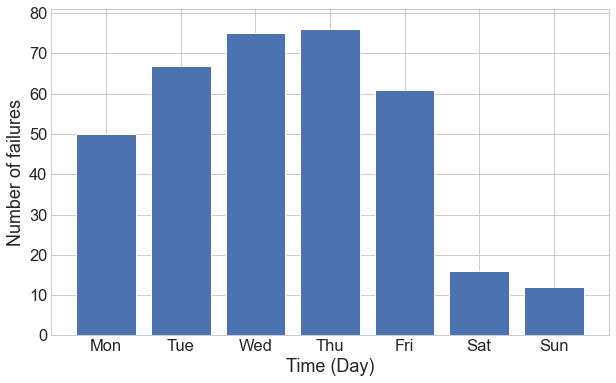

In [410]:
# Finding day name 

df_2019['day_num_of_week'] = df_2019.event_start_time.apply(lambda x: x.timetuple().tm_wday)

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df_2019['day_of_week'] = df_2019.day_num_of_week.apply(lambda x: day_names[x])

# Plotting day name vs failure frequency

# group together same days and have other column as count

even_start_day_2019 = df_2019.groupby(['day_of_week']).count()

even_start_day_2019 = even_start_day_2019.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# plot setup

plt.style.use('seaborn-whitegrid')

fig = plt.figure()

# ax = fig.add_subplot(1, 1, 1)

# ax.set_xticks(np.arange(0, 200, 7))

# ax.set_xticklabels((np.arange(0, 200, 7) / 7).astype(int))

# ax.set_yticks(np.arange(0, even_start_day_2020.org_type.max() + 5, 5))

# plt.scatter(x=even_start_day_2020.index, y=even_start_day_2020.org_type, marker='o', color='r')

plt.bar(x=even_start_day_2019.index, height=even_start_day_2019.org_type)

plt.ylim(top=even_start_day_2019.org_type.max() + 5)

# ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)

# fig.suptitle('2019 number of failures per day')

plt.xlabel('Time (Day)')

plt.ylabel('Number of failures')

# fig.set_size_inches(18.5, 10.5)

fig.savefig('2019_failures_per_day.pdf', bbox_inches='tight')

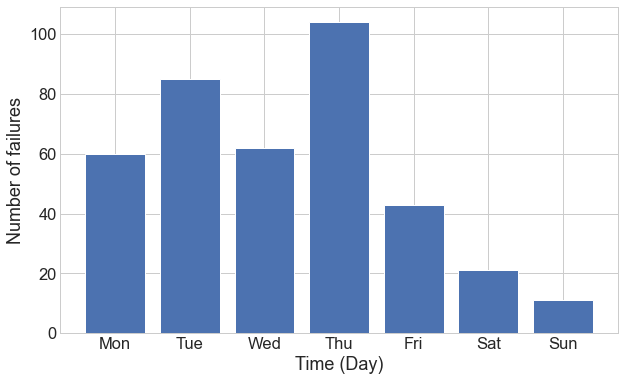

In [411]:
# Finding day name 

df_2018['day_num_of_week'] = df_2018.event_start_time.apply(lambda x: x.timetuple().tm_wday)

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df_2018['day_of_week'] = df_2018.day_num_of_week.apply(lambda x: day_names[x])

# Plotting day name vs failure frequency

# group together same days and have other column as count

even_start_day_2018 = df_2018.groupby(['day_of_week']).count()

even_start_day_2018 = even_start_day_2018.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# plot setup

plt.style.use('seaborn-whitegrid')

fig = plt.figure()

# ax = fig.add_subplot(1, 1, 1)

# ax.set_xticks(np.arange(0, 200, 7))

# ax.set_xticklabels((np.arange(0, 200, 7) / 7).astype(int))

# ax.set_yticks(np.arange(0, even_start_day_2020.org_type.max() + 5, 5))

# plt.scatter(x=even_start_day_2020.index, y=even_start_day_2020.org_type, marker='o', color='r')

plt.bar(x=even_start_day_2018.index, height=even_start_day_2018.org_type)

plt.ylim(top=even_start_day_2018.org_type.max() + 5)

# ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)

# fig.suptitle('2018 number of failures per day')

plt.xlabel('Time (Day)')

plt.ylabel('Number of failures')

# fig.set_size_inches(18.5, 10.5)

fig.savefig('2018_failures_per_day.pdf', bbox_inches='tight')